In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password = getpass.getpass()

········


In [3]:
connection_string = "mysql+pymysql://root:" + password + '@localhost/bank'
engine = create_engine(connection_string)

query = """
SELECT 
    t.type,
    t.operation,
    t.amount AS t_amount,
    t.balance,
    t.k_symbol,
    l.amount AS l_amount,
    l.duration,
    l.payments,
    l.status
FROM
    trans t
        LEFT JOIN
    loan l ON t.account_id = l.account_id;
"""

In [4]:
data = pd.read_sql_query(query, engine)

In [5]:
data.head(30)

type      operation  t_amount  balance k_symbol  l_amount  duration  \
0   PRIJEM          VKLAD     700.0    700.0                NaN       NaN   
1   PRIJEM          VKLAD     900.0    900.0                NaN       NaN   
2   PRIJEM          VKLAD    1000.0   1000.0                NaN       NaN   
3   PRIJEM          VKLAD     600.0    600.0                NaN       NaN   
4   PRIJEM          VKLAD     400.0    400.0                NaN       NaN   
5   PRIJEM          VKLAD    1100.0   1100.0                NaN       NaN   
6   PRIJEM          VKLAD     600.0    600.0                NaN       NaN   
7   PRIJEM          VKLAD    1100.0   1100.0                NaN       NaN   
8   PRIJEM          VKLAD     200.0    200.0                NaN       NaN   
9   PRIJEM          VKLAD     800.0    800.0                NaN       NaN   
10  PRIJEM          VKLAD    1000.0   1000.0                NaN       NaN   
11  PRIJEM          VKLAD     300.0    300.0                NaN       NaN   
12  PRIJEM          VKLAD     800.0    800.0                NaN       NaN   
13  PRIJEM          VKLAD     800.0    800.0                NaN       NaN   
14  PRIJEM          VKLAD     700.0    700.0                NaN       NaN   
15  PRIJEM  PREVOD Z UCTU    5123.0   5923.0   DUCHOD       NaN       NaN   
16  PRIJEM  PREVOD Z UCTU    3401.0   4201.0                NaN       NaN   
17  PRIJEM          VKLAD     500.0    500.0                NaN       NaN   
18  PRIJEM          VKLAD     700.0    700.0                NaN       NaN   
19  PRIJEM  PREVOD Z UCTU    3242.0   3742.0                NaN       NaN   
20  PRIJEM          VKLAD     400.0    400.0                NaN       NaN   
21  PRIJEM  PREVOD Z UCTU    5298.0   5698.0   DUCHOD       NaN       NaN   
22  PRIJEM          VKLAD     400.0    400.0                NaN       NaN   
23  PRIJEM          VKLAD    6774.0   7174.0                NaN       NaN   
24  PRIJEM          VKLAD     300.0    300.0                NaN       NaN   
25  PRIJEM          VKLAD   11832.0  12032.0                NaN       NaN   
26  PRIJEM          VKLAD     300.0    300.0                NaN       NaN   
27  PRIJEM          VKLAD     500.0    500.0                NaN       NaN   
28  PRIJEM          VKLAD     600.0    600.0                NaN       NaN   
29  PRIJEM          VKLAD    1100.0   1100.0                NaN       NaN   

    payments status  
0        NaN   None  
1        NaN   None  
2        NaN   None  
3        NaN   None  
4        NaN   None  
5        NaN   None  
6        NaN   None  
7        NaN   None  
8        NaN   None  
9        NaN   None  
10       NaN   None  
11       NaN   None  
12       NaN   None  
13       NaN   None  
14       NaN   None  
15       NaN   None  
16       NaN   None  
17       NaN   None  
18       NaN   None  
19       NaN   None  
20       NaN   None  
21       NaN   None  
22       NaN   None  
23       NaN   None  
24       NaN   None  
25       NaN   None  
26       NaN   None  
27       NaN   None  
28       NaN   None  
29       NaN   None

In [6]:
data.isna().sum()

type              0
operation         0
t_amount          0
balance           0
k_symbol          0
l_amount     711938
duration     711938
payments     711938
status       711938
dtype: int64

In [7]:
# check the length of data
len(data)

868019

In [8]:
# filter all the NaN
# the tilda symbol is used as an operator invert
# we want to exclude the null values from the duration column
data = data[~data['duration'].isna()]

In [9]:
# the tilda symbol is used as an operator invert

In [10]:
# check to see how it worked out

data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156081 entries, 62 to 868011
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   type       156081 non-null  object 
 1   operation  156081 non-null  object 
 2   t_amount   156081 non-null  float64
 3   balance    156081 non-null  float64
 4   k_symbol   156081 non-null  object 
 5   l_amount   156081 non-null  float64
 6   duration   156081 non-null  float64
 7   payments   156081 non-null  float64
 8   status     156081 non-null  object 
dtypes: float64(5), object(4)
memory usage: 11.9+ MB


In [12]:
# turning duration into categorical, becaus it comes in values of whole years (1,2,3,4,5)
data['duration'] = data['duration'].astype('object')

### cleaning categoricals

In [13]:
# Operation column

In [14]:
# check for unique values to have an overview
data['operation'].value_counts()

VYBER             70189
                  31337
PREVOD NA UCET    25796
VKLAD             22633
PREVOD Z UCTU      5336
VYBER KARTOU        790
Name: operation, dtype: int64

In [15]:
# We want the column names in lower case. And we want prevod na ucet and prevod z uctu under under prevod.
# The same with vyber kartou and vyber. This function will return these under vyber.
# The same with vklad.
# And we want to return unknown instead of an empty space.

In [16]:
def clean_operation(x):
    x = x.lower()
    if 'vyber' in x:
        return 'vyber'
    elif 'prevod' in x:
        return 'prevod'
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'

In [17]:
# test the query

data['operation'].apply(clean_operation).value_counts()

vyber      70979
unknown    31337
prevod     31132
vklad      22633
Name: operation, dtype: int64

In [18]:
# make it official

data['operation'] = data['operation'].apply(clean_operation)

In [19]:
# K_symbol column

In [20]:
# check index of the unique values in k_symbol

data['k_symbol'].value_counts().index

Index(['', 'UROK', 'SLUZBY', 'SIPO', 'UVER', ' ', 'POJISTNE', 'SANKC. UROK'], dtype='object')

In [21]:
# clean the k_symbol values
# through defining a function
# instead of an empty space, we want to get unknown


def clean_ksymbol(x):
    if x in ['', ' ']:
        return 'unknown'
    else:
        return x

In [22]:
# here we make it official

data['k_symbol'] = data['k_symbol'].apply(clean_ksymbol)

In [23]:
# check for unique values to see the changes
data['k_symbol'].value_counts()

unknown        79925
UROK           31337
SLUZBY         23592
SIPO           10482
UVER            7744
POJISTNE        2412
SANKC. UROK      589
Name: k_symbol, dtype: int64

In [31]:
# filter data so that k_symbol is cleaned of 'POJISTINE', 'SANKC. UROK' or 'UVER'
# it means we want to exclude the rows that have "POJISTNE", "SANKC. UROK" or "UVER" as values
# tilda is an operator invert
data = data[~data['k_symbol'].isin(['POJISTINE', 'SANKC. UROK', 'UVER'])]

In [32]:
# run this query to check the changes
data['k_symbol'].value_counts()

unknown     79925
UROK        31337
SLUZBY      23592
SIPO        10482
POJISTNE     2412
Name: k_symbol, dtype: int64

In [33]:
# Type column

In [34]:
# check unique values in type

data['type'].value_counts()

VYDAJ     83095
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

In [35]:
# here we define a function to return all the PRIJEM values


def clean_type(x):
    if 'PRI' in x:
        return 'PRIJEM'
    else:
        return x
    
data['type'] = data['type'].apply(clean_type)

In [36]:
# nothing has changed

In [37]:
data['type'].value_counts()

VYDAJ     83095
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

### check correlations for numerical columns

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# just a reminder from the official documentations
# Seaborn is a Python data visualization library based on matplotlib.
# It provides a high-level interface for drawing attractive and informative statistical graphics.

In [39]:
corr_matrix = data.corr()

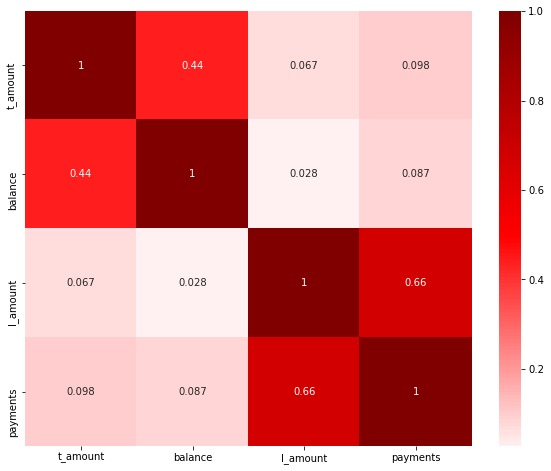

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,
           cmap='seismic',
           center=0,
           annot=True,
           );

Note
* some high correlations between my features: Come back after first model validation and maybe drop highly correlated features

In [41]:
# Visual data exploration

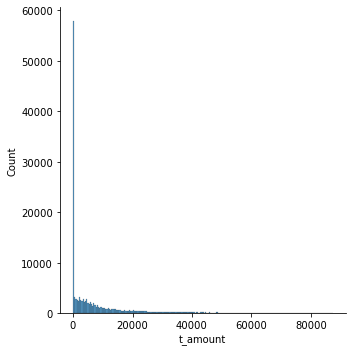

In [42]:
# displot is a density plot
# however distplot is a histogram with a line on it

sns.displot(data['t_amount'])

In [43]:
# with describe we get the vital statistics information about the data

data['t_amount'].describe()

count    147748.000000
mean       8022.366812
std       11980.002505
min           0.000000
25%         134.800000
50%        2700.000000
75%       10721.000000
max       87300.000000
Name: t_amount, dtype: float64

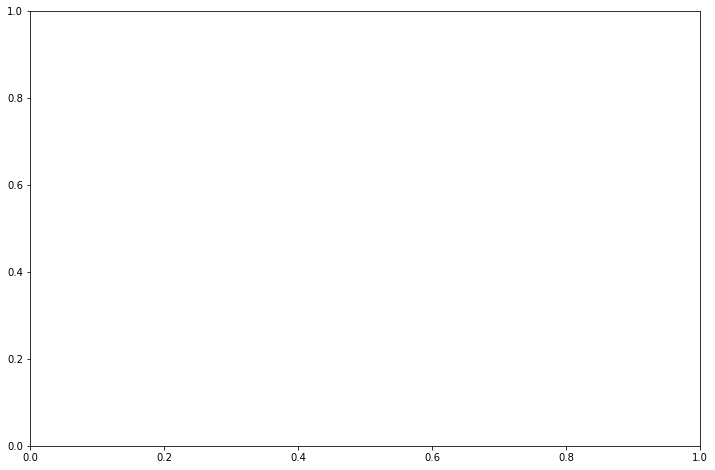

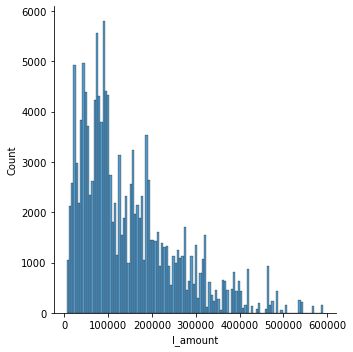

In [44]:
# plot in seaborn 
fig, ax = plt.subplots(figsize=(12,8))
sns.displot(data['l_amount'])

In [45]:
data['l_amount'].describe()

count    147748.000000
mean     145810.456913
std      109587.181764
min        4980.000000
25%       64860.000000
50%      110736.000000
75%      200976.000000
max      590820.000000
Name: l_amount, dtype: float64

In [46]:
# from the comparison:
# the values of t_amount and L_amount are so far away from each other (look at x,y axis of each)
# because of that, we need to normalise these two for our ML model

In [47]:
# Preprocessing step 1

In [48]:
# Normalisation

In [49]:
import numpy as np
from sklearn.preprocessing import Normalizer

X = data.select_dtypes(include = np.number)

In [50]:
X.head()

t_amount  balance  l_amount  payments
62   44749.0  45549.0   79608.0    3317.0
63    1000.0   1000.0   52788.0    4399.0
69    1100.0   1100.0   21924.0     609.0
75     700.0    700.0   23052.0    1921.0
96     900.0    900.0   41904.0    3492.0

In [51]:
# X variable contains numericals and we want to fit X into
# our model, thus normalise it

transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)

In [52]:
# create a dataframe and store it under the variable of small x
# define x_normalized on the row axis(0 axis), and columns = X.columns on the column-axis (1 axis)
x = pd.DataFrame(x_normalized, columns=X.columns)

In [53]:
x

t_amount   balance  l_amount  payments
0       0.438261  0.446096  0.779661  0.032486
1       0.018872  0.018872  0.996191  0.083016
2       0.050028  0.050028  0.997109  0.027697
3       0.030234  0.030234  0.995634  0.082970
4       0.021394  0.021394  0.996090  0.083007
...          ...       ...       ...       ...
147743  0.000253  0.063358  0.997852  0.016631
147744  0.000426  0.096119  0.995232  0.016587
147745  0.000481  0.113176  0.993437  0.016557
147746  0.000706  0.152565  0.988156  0.016469
147747  0.000377  0.089420  0.995856  0.016598

[147748 rows x 4 columns]

In [54]:
data['duration'].value_counts()

24.0    32595
12.0    31278
60.0    29797
48.0    27330
36.0    26748
Name: duration, dtype: int64

In [55]:
x

t_amount   balance  l_amount  payments
0       0.438261  0.446096  0.779661  0.032486
1       0.018872  0.018872  0.996191  0.083016
2       0.050028  0.050028  0.997109  0.027697
3       0.030234  0.030234  0.995634  0.082970
4       0.021394  0.021394  0.996090  0.083007
...          ...       ...       ...       ...
147743  0.000253  0.063358  0.997852  0.016631
147744  0.000426  0.096119  0.995232  0.016587
147745  0.000481  0.113176  0.993437  0.016557
147746  0.000706  0.152565  0.988156  0.016469
147747  0.000377  0.089420  0.995856  0.016598

[147748 rows x 4 columns]

In [56]:
data

type operation  t_amount  balance k_symbol  l_amount duration  \
62      PRIJEM    prevod   44749.0  45549.0  unknown   79608.0     24.0   
63      PRIJEM     vklad    1000.0   1000.0  unknown   52788.0     12.0   
69      PRIJEM     vklad    1100.0   1100.0  unknown   21924.0     36.0   
75      PRIJEM     vklad     700.0    700.0  unknown   23052.0     12.0   
96      PRIJEM     vklad     900.0    900.0  unknown   41904.0     12.0   
...        ...       ...       ...      ...      ...       ...      ...   
867954  PRIJEM   unknown      67.9  17036.9     UROK  268320.0     60.0   
867981  PRIJEM   unknown     187.2  42249.6     UROK  437460.0     60.0   
867986  PRIJEM   unknown     132.0  31046.4     UROK  272520.0     60.0   
867997  PRIJEM   unknown     271.6  58694.2     UROK  380160.0     60.0   
868011  PRIJEM   unknown     190.7  45255.1     UROK  504000.0     60.0   

        payments status  
62        3317.0      A  
63        4399.0      A  
69         609.0      A  
75        1921.0      A  
96        3492.0      A  
...          ...    ...  
867954    4472.0      C  
867981    7291.0      C  
867986    4542.0      C  
867997    6336.0      C  
868011    8400.0      C  

[147748 rows x 9 columns]

In [57]:
cat = data.select_dtypes(include = np.object)

<ipython-input-57-001fb89197c2>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = data.select_dtypes(include = np.object)


In [58]:
cat

type operation k_symbol duration status
62      PRIJEM    prevod  unknown     24.0      A
63      PRIJEM     vklad  unknown     12.0      A
69      PRIJEM     vklad  unknown     36.0      A
75      PRIJEM     vklad  unknown     12.0      A
96      PRIJEM     vklad  unknown     12.0      A
...        ...       ...      ...      ...    ...
867954  PRIJEM   unknown     UROK     60.0      C
867981  PRIJEM   unknown     UROK     60.0      C
867986  PRIJEM   unknown     UROK     60.0      C
867997  PRIJEM   unknown     UROK     60.0      C
868011  PRIJEM   unknown     UROK     60.0      C

[147748 rows x 5 columns]

In [59]:
cat = cat.drop(['status'], axis=1)

In [60]:
cat.head()

type operation k_symbol duration
62  PRIJEM    prevod  unknown     24.0
63  PRIJEM     vklad  unknown     12.0
69  PRIJEM     vklad  unknown     36.0
75  PRIJEM     vklad  unknown     12.0
96  PRIJEM     vklad  unknown     12.0

In [61]:
categorical = pd.get_dummies(cat,
               drop_first=True,
               columns=['type', 'operation', 'k_symbol', 'duration'])

# Modelling

In [62]:
x.head()

t_amount   balance  l_amount  payments
0  0.438261  0.446096  0.779661  0.032486
1  0.018872  0.018872  0.996191  0.083016
2  0.050028  0.050028  0.997109  0.027697
3  0.030234  0.030234  0.995634  0.082970
4  0.021394  0.021394  0.996090  0.083007

In [63]:
categorical.head()

type_VYBER  type_VYDAJ  operation_unknown  operation_vklad  \
62           0           0                  0                0   
63           0           0                  0                1   
69           0           0                  0                1   
75           0           0                  0                1   
96           0           0                  0                1   

    operation_vyber  k_symbol_SIPO  k_symbol_SLUZBY  k_symbol_UROK  \
62                0              0                0              0   
63                0              0                0              0   
69                0              0                0              0   
75                0              0                0              0   
96                0              0                0              0   

    k_symbol_unknown  duration_24.0  duration_36.0  duration_48.0  \
62                 1              1              0              0   
63                 1              0              0              0   
69                 1              0              1              0   
75                 1              0              0              0   
96                 1              0              0              0   

    duration_60.0  
62              0  
63              0  
69              0  
75              0  
96              0

In [64]:
y = data['status']

In [65]:
len(x), len(y), len(data)

(147748, 147748, 147748)

In [66]:
X = np.concatenate 

### Explanation for dummie variables

In [67]:
import random
gender_lst = ['M', 'F']

In [68]:
df_example = pd.DataFrame({'gender':[random.choice(gender_lst) for i in range(20)]})

In [69]:
pd.get_dummies(df_example, columns=['gender'], drop_first=True)

gender_M
0          0
1          0
2          0
3          0
4          0
5          1
6          0
7          1
8          1
9          0
10         1
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         1
19         1

Recall the meaning of A, B, C, D

* **A**: contract finished, no problems (we have a lot of them)
* **B**: contract finished, loan not payed
* **C**: running contract, OK so far (we have a lot of them)
* **D**: running contract, client in debt